In [9]:
import numpy as np, pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Cargar el dataset de Diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["Progression"] = diabetes.target  

X = df[['bmi']]  
y = df['Progression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresión)")

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")


X_train_const = sm.add_constant(X_train)  # Agregar término de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()

print(modelo_stats.summary())


Error MAE: 52.26 (puntos de progresión)
R²: 0.23
RMSE: 63.73
MAPE: 45.88%
                            OLS Regression Results                            
Dep. Variable:            Progression   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     202.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           1.40e-36
Time:                        19:03:55   Log-Likelihood:                -1958.2
No. Observations:                 353   AIC:                             3920.
Df Residuals:                     351   BIC:                             3928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

## Outliers. Cómo hacer un boxplot (herramienta visual para detectar outliers)

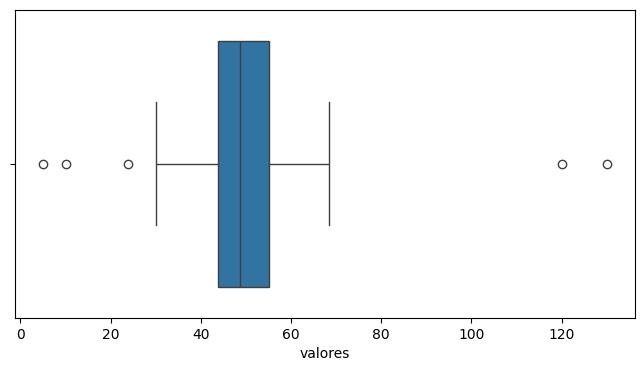

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generamos datos con algunos valores atípicos
np.random.seed(42)
valores_normales = np.random.normal(loc=50, scale=10, size=100)  # Datos alrededor de 50
outliers = np.array([10, 5, 120, 130])  # Valores atípicos extremos

# Combinamos los datos en un DataFrame
df = pd.DataFrame({'valores': np.concatenate([valores_normales, outliers])})

# Creamos el Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['valores']) #df['valores'] es una columna de un DataFrame que contiene los datos que queremos analizar.

# Mostramos el gráfico
plt.show()

In [19]:
from scipy.stats import zscore

# Crear datos de ejemplo
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)  # Datos con distribución normal
data = np.append(data, [120, 130])  # Agregar outliers artificiales
df = pd.DataFrame({'valores': data})

# Calcular el Z-score
df['z_score'] = zscore(df['valores'])

# Filtrar los outliers
outliers = df[df['z_score'].abs() > 3] # Se considera outlier cuando Z-score es > 3 o < -3, porque cualquier valor más allá de ±3 desviaciones estándar es extremadamente raro.

# Filtrar outliers poisitivos y negativos
outliers_positivos = df[df['z_score'] > 3]   # Solo valores muy altos
outliers_negativos = df[df['z_score'] < -3]  # Solo valores muy bajos


print("Valores atípicos detectados:\n", outliers)
print(outliers_negativos)

Valores atípicos detectados:
      valores   z_score
100    120.0  5.023242
101    130.0  5.745517
Empty DataFrame
Columns: [valores, z_score]
Index: []


Usaremos IQR si hay muchos outliers o si los datos tienen una distribución asimétrica.

In [14]:
import numpy as np

# Calcular cuartiles
Q1 = np.percentile(df['valores'], 25)  # Primer cuartil (Q1)
Q3 = np.percentile(df['valores'], 75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df[(df['valores'] < limite_inferior) | (df['valores'] > limite_superior)]
print("Outliers encontrados:\n", outliers) # Los valores que están fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR] se consideran outliers.


Outliers encontrados:
         valores   z_score
74    23.802549 -1.924858
100  120.000000  5.023242
101  130.000000  5.745517


In [ ]:
# Identifica outliers en los siguientes dataset: DIAMONDS, DIABETES, CALIFORNIA HOUSING

